In [ ]:
# ============================================================
# ASSOCIATION RULES (Apriori dan FP-Growth)
# ============================================================
# Fokus: menemukan hubungan “jika–maka” antar kejadian dalam data kategorikal.
# Konteks industri:
#   - Pola cacat produk (jika cacat A muncul, cacat B sering muncul bersamaan)
#   - Pola penggunaan mesin & defect
#   - Analisis komplain pelanggan
#   - Hubungan antar penyebab kegagalan (root cause pattern)
# ============================================================

# ------------------------------------------------------------
# 1) Konsep Dasar
# ------------------------------------------------------------
# Association rules mencari pola berbentuk:
#     IF {kondisi X} THEN {kejadian Y}
# Contoh:
#     IF {Mesin = A, Shift = Malam} THEN {Defect = Retak}

# Tujuannya bukan prediksi, tapi *menemukan asosiasi menarik*
# dari data besar secara eksploratif.

# ------------------------------------------------------------
# 2) Istilah Utama
# ------------------------------------------------------------
# - Transaction = 1 baris observasi (mis. 1 batch produksi atau 1 pelanggan)
# - Item = kategori yang muncul (mis. tipe defect, mesin, operator)
# - Itemset = kombinasi item
# - Rule = asosiasi (X → Y)

# ------------------------------------------------------------
# 3) Ukuran Kekuatan Aturan
# ------------------------------------------------------------
# a) Support
#    = proporsi transaksi yang mengandung X dan Y
#    = P(X ∩ Y)
#    → Menunjukkan seberapa sering pola muncul di data
#
# b) Confidence
#    = P(Y | X)
#    = Seberapa sering Y terjadi jika X muncul
#    → Mengukur kekuatan hubungan sebab-akibat praktis
#
# c) Lift
#    = P(Y | X) / P(Y)
#    = 1 → tidak ada hubungan
#    >1 → X meningkatkan peluang Y
#    <1 → X menurunkan peluang Y
#
# d) Leverage (opsional)
#    = P(X ∩ Y) – P(X)*P(Y)
#    → Mengukur perbedaan antara frekuensi aktual dan ekspektasi acak

# ------------------------------------------------------------
# 4) Algoritma Utama
# ------------------------------------------------------------
# (a) Apriori
# - Menghasilkan semua kombinasi itemset yang memenuhi threshold minimum support.
# - Lalu menghasilkan aturan asosiasi dari itemset tersebut.
# - Kelemahan: lambat untuk data besar karena eksplorasi kombinasi banyak.

# (b) FP-Growth (Frequent Pattern Growth)
# - Mengompresi data menjadi “FP-tree” (struktur pohon frekuensi).
# - Tidak perlu eksplorasi kombinasi satu per satu seperti Apriori.
# - Jauh lebih cepat dan efisien untuk dataset besar.

# ------------------------------------------------------------
# 5) Langkah Analisis Praktis
# ------------------------------------------------------------
# 1. Definisikan "transaksi" dan "item"
#    - Dalam industri: satu transaksi bisa berarti satu batch produksi.
# 2. Lakukan encoding data kategorikal → format transaksi.
# 3. Jalankan algoritma Apriori / FP-Growth untuk mencari itemset sering.
# 4. Tentukan minimum support dan confidence.
# 5. Interpretasi aturan dengan lift dan relevansi praktis.

# ------------------------------------------------------------
# 6) Interpretasi Praktis
# ------------------------------------------------------------
# Contoh hasil aturan:
#   Rule: {Mesin = B, Shift = Malam} → {Defect = Gores}
#   Support = 0.12, Confidence = 0.70, Lift = 1.8
#
# Artinya:
#   - 12% batch memiliki kombinasi ini.
#   - Jika mesin B beroperasi di shift malam, peluang defect gores 70%.
#   - Lift > 1 berarti kejadian ini 1.8x lebih sering dari kebetulan.
#
# Aksi industri:
#   → Lakukan inspeksi terhadap mesin B pada shift malam.

# ------------------------------------------------------------
# 7) Bird’s-eye View
# ------------------------------------------------------------
# - Association rules bukan regresi atau prediksi, tapi eksplorasi pola.
# - Support tinggi → pola sering muncul.
# - Confidence tinggi → pola konsisten.
# - Lift > 1 → pola menarik secara praktis.
# - Pilih hanya aturan yang punya arti bisnis/logis, bukan sekadar angka tinggi.

# ------------------------------------------------------------
# 8) Hubungan dengan Rekayasa Kualitas
# ------------------------------------------------------------
# - Dalam analisis defect (QC Circle), bisa membantu menemukan kombinasi faktor penyebab.
# - Dalam survei pelanggan, bisa menemukan pola jawaban antar aspek.
# - Dalam perawatan mesin, bisa menemukan kombinasi alarm sensor yang sering muncul bersama.
#
# Contoh:
#   {Vibrasi tinggi, Operator baru} → {Kegagalan bearing}
#   Lift = 2.3 → lebih dari 2x kemungkinan gagal dibanding kondisi normal.

# ------------------------------------------------------------
# 9) Kalimat ringkas laporan
# ------------------------------------------------------------
# “Analisis asosiasi menggunakan FP-Growth menunjukkan bahwa kombinasi
#  ‘Mesin B’ dan ‘Shift malam’ berasosiasi kuat dengan defect jenis ‘gores’
#  (support 12%, confidence 70%, lift 1.8). Pola ini menjadi indikasi bahwa
#  faktor operasi malam perlu diperiksa dalam program perbaikan kualitas.”

In [1]:
# ============================================================
# ASSOCIATION RULES (Apriori & FP-Growth)
# ============================================================
# Contoh kasus: pola hubungan antara kondisi produksi dan jenis cacat
# ============================================================

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# ------------------------------------------------------------
# 1. Contoh Data (setiap baris = 1 batch produksi)
# ------------------------------------------------------------
data = [
    ['Mesin_A', 'Shift_Pagi', 'Operator_Junior', 'Defect_Retak'],
    ['Mesin_B', 'Shift_Malam', 'Operator_Senior', 'Defect_Gores'],
    ['Mesin_B', 'Shift_Malam', 'Operator_Junior', 'Defect_Gores'],
    ['Mesin_A', 'Shift_Siang', 'Operator_Senior', 'Defect_Tidak_Ada'],
    ['Mesin_B', 'Shift_Malam', 'Operator_Junior', 'Defect_Retak'],
    ['Mesin_A', 'Shift_Pagi', 'Operator_Junior', 'Defect_Gores'],
    ['Mesin_B', 'Shift_Malam', 'Operator_Senior', 'Defect_Gores'],
]

df = pd.DataFrame(data, columns=['Mesin', 'Shift', 'Operator', 'Defect'])
print(df.head())

     Mesin        Shift         Operator            Defect
0  Mesin_A   Shift_Pagi  Operator_Junior      Defect_Retak
1  Mesin_B  Shift_Malam  Operator_Senior      Defect_Gores
2  Mesin_B  Shift_Malam  Operator_Junior      Defect_Gores
3  Mesin_A  Shift_Siang  Operator_Senior  Defect_Tidak_Ada
4  Mesin_B  Shift_Malam  Operator_Junior      Defect_Retak


In [2]:
# ------------------------------------------------------------
# 2. One-Hot Encoding untuk format transaksi
# ------------------------------------------------------------
df_encoded = pd.get_dummies(df)
print("\nData setelah one-hot encoding:")
print(df_encoded.head())


Data setelah one-hot encoding:
   Mesin_Mesin_A  Mesin_Mesin_B  Shift_Shift_Malam  Shift_Shift_Pagi  \
0           True          False              False              True   
1          False           True               True             False   
2          False           True               True             False   
3           True          False              False             False   
4          False           True               True             False   

   Shift_Shift_Siang  Operator_Operator_Junior  Operator_Operator_Senior  \
0              False                      True                     False   
1              False                     False                      True   
2              False                      True                     False   
3               True                     False                      True   
4              False                      True                     False   

   Defect_Defect_Gores  Defect_Defect_Retak  Defect_Defect_Tidak_Ada  
0      

In [3]:
# ------------------------------------------------------------
# 3. Apriori Algorithm
# ------------------------------------------------------------
# Cari itemset yang muncul cukup sering (support ≥ 0.3)
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
print("\nFrequent itemsets (Apriori):")
print(frequent_itemsets)


Frequent itemsets (Apriori):
    support                                           itemsets
0  0.428571                                    (Mesin_Mesin_A)
1  0.571429                                    (Mesin_Mesin_B)
2  0.571429                                (Shift_Shift_Malam)
3  0.571429                         (Operator_Operator_Junior)
4  0.428571                         (Operator_Operator_Senior)
5  0.571429                              (Defect_Defect_Gores)
6  0.571429                 (Mesin_Mesin_B, Shift_Shift_Malam)
7  0.428571               (Mesin_Mesin_B, Defect_Defect_Gores)
8  0.428571           (Defect_Defect_Gores, Shift_Shift_Malam)
9  0.428571  (Mesin_Mesin_B, Defect_Defect_Gores, Shift_Shi...


In [4]:
# ------------------------------------------------------------
# 4. Bangun aturan asosiasi dari itemset tersebut
# ------------------------------------------------------------
rules_apriori = association_rules(df=frequent_itemsets, num_itemsets=frequent_itemsets,metric="lift", min_threshold=1)
print("\nAturan asosiasi (Apriori):")
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Aturan asosiasi (Apriori):
                                 antecedents  \
0                            (Mesin_Mesin_B)   
1                        (Shift_Shift_Malam)   
2                            (Mesin_Mesin_B)   
3                      (Defect_Defect_Gores)   
4                      (Defect_Defect_Gores)   
5                        (Shift_Shift_Malam)   
6       (Mesin_Mesin_B, Defect_Defect_Gores)   
7         (Mesin_Mesin_B, Shift_Shift_Malam)   
8   (Defect_Defect_Gores, Shift_Shift_Malam)   
9                            (Mesin_Mesin_B)   
10                     (Defect_Defect_Gores)   
11                       (Shift_Shift_Malam)   

                                 consequents   support  confidence    lift  
0                        (Shift_Shift_Malam)  0.571429        1.00  1.7500  
1                            (Mesin_Mesin_B)  0.571429        1.00  1.7500  
2                      (Defect_Defect_Gores)  0.428571        0.75  1.3125  
3                            (Mesin_Mes

In [5]:
# ------------------------------------------------------------
# 5. Alternatif: FP-Growth (lebih cepat untuk data besar)
# ------------------------------------------------------------
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.3, use_colnames=True)
rules_fp = association_rules(df=frequent_itemsets_fp, num_itemsets=frequent_itemsets_fp,metric="lift", min_threshold=1)

print("\nAturan asosiasi (FP-Growth):")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Aturan asosiasi (FP-Growth):
                                 antecedents  \
0                      (Defect_Defect_Gores)   
1                        (Shift_Shift_Malam)   
2                            (Mesin_Mesin_B)   
3                        (Shift_Shift_Malam)   
4                            (Mesin_Mesin_B)   
5                      (Defect_Defect_Gores)   
6       (Mesin_Mesin_B, Defect_Defect_Gores)   
7         (Mesin_Mesin_B, Shift_Shift_Malam)   
8   (Defect_Defect_Gores, Shift_Shift_Malam)   
9                            (Mesin_Mesin_B)   
10                     (Defect_Defect_Gores)   
11                       (Shift_Shift_Malam)   

                                 consequents   support  confidence    lift  
0                        (Shift_Shift_Malam)  0.428571        0.75  1.3125  
1                      (Defect_Defect_Gores)  0.428571        0.75  1.3125  
2                        (Shift_Shift_Malam)  0.571429        1.00  1.7500  
3                            (Mesin_M

In [ ]:
# ------------------------------------------------------------
# 6. Interpretasi sederhana
# ------------------------------------------------------------
# Misal kita temukan aturan:
# {Mesin_B, Shift_Malam} -> {Defect_Gores}
# support = 0.43, confidence = 0.75, lift = 1.6
#
# Artinya:
# - Pola ini muncul di 43% batch.
# - Jika mesin B beroperasi di shift malam, 75% batch mengalami defect gores.
# - Lift > 1 → hubungan kuat, bukan kebetulan.
#
# Aksi kualitas:
# → Fokus inspeksi mesin B pada shift malam,
#   mungkin perlu evaluasi pelumasan atau pencahayaan kerja.

# ------------------------------------------------------------
# 7. Tips Praktis
# ------------------------------------------------------------
# - Gunakan min_support kecil (0.05–0.1) untuk dataset besar.
# - Gunakan lift > 1.2 & confidence > 0.6 sebagai filter awal.
# - Abaikan pola yang tidak punya makna proses/manufaktur.

In [ ]:
# Proces Mining
# Process Mining adalah teknik untuk menganalisis proses bisnis berdasarkan event-log
# yaitu data catatan kejadian yang terjadi di sistem(ERP, BPM, web app)
# Tujuannya adalah memahami bagaimana proses sebenarnya berjalan(as-is), menemukan hambatan, serta membandingkan proses nyata dengan prosedur resmi(to-be)

# Apa saja yang bisa dilakukan process mining?
# 1. Process discovery -> menghasilkan model proses(petri-net, BPMN) dari event log
# 2. Conformance checking -> mengecek apakah proses nyata sesuai dengan model ideal
# 3. Performance analysis -> mengukur durasi aktivitas, waktu tunggu, bottleneck, throughput, dsb
# 4. Event log filtering & preprocessing -> membersihkan, memotong, atau memfilter log berdasarkan case/aktivitas
# 5. Visualisasi proses -> memetakan diagram proses secara otomatis

In [ ]:
# 1) Process Discovery di PM4PY

# Metode untuk membangun model proses dari event log.
# A. Inductive Miner (IM) — paling umum
pm4py.discover_petri_net_inductive()
# Keluaran: Petri Net + initial marking + final marking
# Kelebihan: stabil, selalu menghasilkan model yang sound
# Cocok untuk: akademik & industri
# Variannya: IM, IMf (IM for infrequent behavior), IMd (IM directly-follows)

# B. Heuristic Miner
pm4py.discover_petri_net_heuristics()
# Keluaran: Petri Net
# Cocok untuk log noise atau variasi tinggi
# Umum dalam IT service & business processes

# C. Alpha Miner
pm4py.discover_petri_net_alpha()
# Model klasik dalam literature
# Tidak terlalu robust → hanya cocok untuk log bersih

# D. Directly Follows Graph (DFG)
pm4py.discover_dfg()
# Keluaran: Graph sederhana (A → B → C)
# Cocok untuk visual cepat
# Biasanya dipakai sebelum metode discovery lain

# E. BPMN Discovery
pm4py.convert_to_bpmn()
# Bisa membangun model BPMN dari log
# Output mudah dibaca oleh user non-teknis


# 2) Conformance Checking di PM4PY
# Untuk membandingkan model proses dengan event log.

# A. Alignment-Based Conformance (paling akurat)
# pm4py.conformance_diagnostics_alignments()
# Menghasilkan:
# fitness per case
# langkah log vs model

# B. Token Replay
pm4py.fitness_token_based_replay()
# Lebih cepat tapi kurang detail
# Cocok untuk log besar

# C. Behavioral Profile
pm4py.algo.analysis.footprints
# Bandingkan hubungan aktivitas (order, parallel, exclusive)


#3) Performance Analysis
# Untuk menganalisis waktu, bottleneck, throughput.

# A. DFG Performance
pm4py.discover_performance_dfg()
# Memberikan: waktu rata-rata antar aktivitas, waiting time, processing time

# B. Petri Net Performance Analysis
pm4py.discover_petri_net_performance()
# Annotates Petri net dengan timestamp (bottleneck map)

# C. Process Statistics
pm4py.get_statistics_journey()
# Cycle time, Arrival rate, Service time, Throughput


# 4) Variant Analysis
# Mencari variasi alur proses.
pm4py.get_variants()
# Cocok untuk: melihat jalur rework, variasi abnormal, "most frequent path"


# 5) Event Log Filtering di PM4PY
# Tools untuk membersihkan log:
# Filter activity:
pm4py.filter_event_attribute_values()
# Filter case length:
pm4py.filter_case_size()
# Filter timeframe:
pm4py.filter_time_range()

In [11]:
import os

# ganti path sesuai instalasi Graphviz kamu
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [12]:
# ---------------------------------------------------------
# 1) IMPORT LIBRARIES
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import pm4py
import graphviz
from datetime import datetime, timedelta
import random
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map
# ---------------------------------------------------------
# 2) MEMBUAT DATA EVENT LOG DUMMY
# ---------------------------------------------------------

np.random.seed(42)

def random_time(start, max_minutes=30):
    """Generate random timestamp offset."""
    return start + timedelta(minutes=np.random.randint(1, max_minutes))

records = []
case_count = 10  # jumlah produk yang dianalisis

for case_id in range(1, case_count + 1):
    t0 = datetime(2024, 1, 1, 8, 0, 0)

    # Cutting
    t1 = random_time(t0)
    records.append([case_id, "Cutting", t0, "Machine A"])

    # Assembly
    t2 = random_time(t1)
    records.append([case_id, "Assembly", t1, "Machine B"])

    # Inspection (bisa fail)
    t3 = random_time(t2)
    records.append([case_id, "Inspection", t2, "QC1"])

    # Simulasi probabilitas gagal inspeksi
    failed = np.random.rand() < 0.3  # 30% produk gagal

    if failed:
        # Rework
        t4 = random_time(t3)
        records.append([case_id, "Rework", t3, "Machine R"])

        # Inspection ulang
        t5 = random_time(t4)
        records.append([case_id, "Inspection", t4, "QC2"])

        # Packaging
        t6 = random_time(t5)
        records.append([case_id, "Packaging", t5, "Warehouse"])
    else:
        # Packaging langsung
        t4 = random_time(t3)
        records.append([case_id, "Packaging", t3, "Warehouse"])

# Membuat DataFrame
df = pd.DataFrame(records, columns=["case_id", "activity", "timestamp", "resource"])

print(df.head(10))

   case_id    activity           timestamp   resource
0        1     Cutting 2024-01-01 08:00:00  Machine A
1        1    Assembly 2024-01-01 08:07:00  Machine B
2        1  Inspection 2024-01-01 08:27:00        QC1
3        1      Rework 2024-01-01 08:56:00  Machine R
4        1  Inspection 2024-01-01 09:04:00        QC2
5        1   Packaging 2024-01-01 09:33:00  Warehouse
6        2     Cutting 2024-01-01 08:00:00  Machine A
7        2    Assembly 2024-01-01 08:07:00  Machine B
8        2  Inspection 2024-01-01 08:33:00        QC1
9        2      Rework 2024-01-01 08:52:00  Machine R


In [13]:
# ✅ 3) MENGUBAH DATAFRAME MENJADI EVENT LOG PM4PY

# Mengubah dataframe menjadi event log
log = pm4py.format_dataframe(
    df,
    case_id='case_id',
    activity_key='activity',
    timestamp_key='timestamp'
)

event_log = pm4py.convert_to_event_log(log)
print(event_log)

[{'attributes': {'concept:name': '1'}, 'events': [{'case_id': 1, 'activity': 'Cutting', 'timestamp': Timestamp('2024-01-01 08:00:00+0000', tz='UTC'), 'resource': 'Machine A', 'concept:name': 'Cutting', 'time:timestamp': Timestamp('2024-01-01 08:00:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'case_id': 1, 'activity': 'Packaging', 'timestamp': Timestamp('2024-01-01 09:33:00+0000', tz='UTC'), 'resource': 'Warehouse', 'concept:name': 'Packaging', 'time:timestamp': Timestamp('2024-01-01 09:33:00+0000', tz='UTC'), '@@index': 5, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '9'}, 'events': [{'case_id': 9, 'activity': 'Cutting', 'timestamp': Timestamp('2024-01-01 08:00:00+0000', tz='UTC'), 'resource': 'Machine A', 'concept:name': 'Cutting', 'time:timestamp': Timestamp('2024-01-01 08:00:00+0000', tz='UTC'), '@@index': 42, '@@case_index': 9}, '..', {'case_id': 9, 'activity': 'Packaging', 'timestamp': Timestamp('2024-01-01 08:27:00+0000', tz='UTC'), 'resource': '

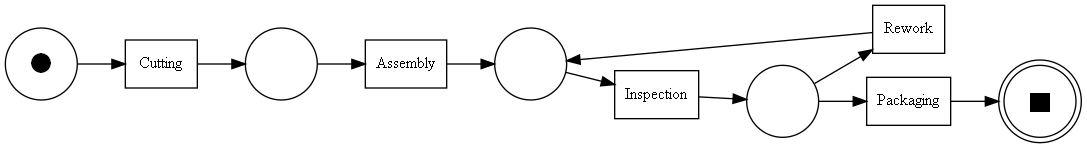

In [14]:
#✅ 4) DISCOVERY: Membangun Model Proses (Petri Net)

net, im, fm = pm4py.discover_petri_net_inductive(event_log)

# Visualisasi model proses
pm4py.view_petri_net(net, im, fm)

# Model ini akan menunjukkan alur:
# Cutting → Assembly → Inspection
# Jika gagal → Rework → Inspection → Packaging

# Terlihat alur diagram proses sudah benar, berarti tidak ada proses yang terlewat

In [18]:
# 5) CONFORMANCE CHECK: Apakah proses sesuai SOP?

alignments = pm4py.conformance_diagnostics_alignments(event_log, net, im, fm)
print("Hasil Alignment (ringkas):")
for a in alignments[:3]:
    print(a)

# Fungsinya:
# mendeteksi penyimpangan proses
# melihat case mana yang melewati jalur tidak normal

# jika cost = 0 maka event sempurna karena tidak ada biaya yang keluar alias sesuai standar/SOP
# kalao cost tinggi berarti ada proses yang menyimpang

# kalau visited states = 6 berarti produk dilakukan yang rework

# lp solved = 1, semakin tinggi berarti model semakin kompleks

# fitness = 1 berarti 100% sempurna proses sesuai SOP
# kalau 0.8 ada beberapa deviasi,kalau >0.7 ada penyimpangan SOP

aligning log, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

Hasil Alignment (ringkas):
{'alignment': [('Cutting', 'Cutting'), ('Assembly', 'Assembly'), ('Inspection', 'Inspection'), ('Rework', 'Rework'), ('Inspection', 'Inspection'), ('Packaging', 'Packaging')], 'cost': 0, 'visited_states': 6, 'queued_states': 20, 'traversed_arcs': 20, 'lp_solved': 1, 'fitness': 1.0, 'bwc': 100000}
{'alignment': [('Cutting', 'Cutting'), ('Assembly', 'Assembly'), ('Inspection', 'Inspection'), ('Packaging', 'Packaging')], 'cost': 0, 'visited_states': 4, 'queued_states': 13, 'traversed_arcs': 13, 'lp_solved': 1, 'fitness': 1.0, 'bwc': 80000}
{'alignment': [('Cutting', 'Cutting'), ('Assembly', 'Assembly'), ('Inspection', 'Inspection'), ('Rework', 'Rework'), ('Inspection', 'Inspection'), ('Packaging', 'Packaging')], 'cost': 0, 'visited_states': 6, 'queued_states': 20, 'traversed_arcs': 20, 'lp_solved': 1, 'fitness': 1.0, 'bwc': 100000}


In [16]:
# 6) PERFORMANCE ANALYSIS: Menghitung Cycle Time

# Mengubah kembali log ke dataframe
df_log = pm4py.convert_to_dataframe(event_log)

# Mengurutkan berdasarkan case_id dan timestamp
df_log = df_log.sort_values(by=["case_id", "timestamp"])

# Hitung cycle time per case
cycle_times = df_log.groupby("case_id").apply(
    lambda x: (x["timestamp"].max() - x["timestamp"].min()).total_seconds()/60
)

print("Cycle time per case (menit):")
print(cycle_times)
print("Rata-rata cycle time:", cycle_times.mean(), "menit")

# Terlihat case id proses 6 memiliki waktu siklus tertinggi, bisa dicek ada apa disana

Cycle time per case (menit):
case_id
1      93.0
2      87.0
3      36.0
4      38.0
5      50.0
6     103.0
7      59.0
8      54.0
9      27.0
10     29.0
dtype: float64
Rata-rata cycle time: 57.6 menit


In [ ]:
# Collaborative Filtering 
# Collaborative filtering adalah sebuah metode dalam recommender systems yang memberikan rekomendasi berdasarkan - 
# - prilaku atau preferensi sekelompok pengguna
# intinya: "orang yang punya selera mirip biasanya menyukai hal yang sama"
# contoh:
# "netflix merekomendasikan film berdasarkan film yang ditonton orang-orang lain yang mirip dengan anda"
# "spotify merekomendasikan lagu berdasarkan orang lain yang mendengarkan lagu yang sama dengna anda

# Konsep dasar
# collaborative filtering bekerja dengan cara:
# 1. mengumpulkan riwayat interkasi, misalnya: rating film, pembelian barang, klik atau waktu tonton
# 2. membangun kemiripan antar pengguna atau antar item
# 3. menggunakan informasi kemiripan tersebut untuk memprediksi apa yang mungkin disukai oleh pengguna tertentu

# Dua jenis collaborative filtering
# ----------
# 1. User-based CF
# ide: "jika user A mirip dengan user B, dan user B menyukai item X, maka user A mungkin juga menyukai item X"
# contoh: jika menonton banyak film aksi dan thriller, sistem mencari pengguna lain dengan pola serupa -> kemudian memberikan rekomendasi film yang mereka sukai
# ----------
# 2. Item-based CF
# ide: "jika item X mirip dengan item Y, dan user A menyukai item X, maka rekomendasikan item Y"
# contoh: jika menyukai film "Avengers", sistem akan mencari film lain yang biasanya ditonton oleh orang yang suka film Avengers

# Bagaimana mengukur kemiripan (similarity)?
# metode umum: Cosine Similarity, Pearson Correlatio, MSD (Mean Squared Difference)
# Similarity dihitung antar: user-user(user-based cf), dan item-item(item-based cf)

# Output dari collaborative filltering
# CF dapat memprediksi:
# rating yang mungkin diberikan user terhadap satu item
# daftar rekomendasi item yang relevan
# ranking sistem berdasarkan skor prediksi

In [ ]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# -------------------------------------------
# 1. Siapkan data rating
# -------------------------------------------
# Format data: userId, itemId, rating
data = [
    ('U1', 'I1', 4.0),
    ('U1', 'I2', 5.0),
    ('U2', 'I1', 3.0),
    ('U2', 'I3', 4.0),
    ('U3', 'I2', 2.0),
    ('U3', 'I3', 5.0),
    ('U4', 'I1', 2.0),
    ('U4', 'I2', 4.0),
    ('U4', 'I3', 3.0)
]

# Reader: min/max rating
reader = Reader(rating_scale=(1, 5))

# Load data ke Surprise Dataset
dataset = Dataset.load_from_df(
    __import__("pandas").DataFrame(data, columns=['user', 'item', 'rating']),
    reader
)

print(dataset)

In [ ]:
# -------------------------------------------
# 2. Split train dan test
# -------------------------------------------
trainset, testset = train_test_split(dataset, test_size=0.3)

In [ ]:
# -------------------------------------------
# 3. Pilih metode KNNBasic dan similarity
# -------------------------------------------
sim_options = {
    'name': 'cosine',       # cosine / msd / pearson
    'user_based': True      # True = user-user CF, False = item-item CF
}

algo = KNNBasic(sim_options=sim_options)

In [ ]:
# -------------------------------------------
# 4. Train model
# -------------------------------------------
algo.fit(trainset)

In [ ]:
# -------------------------------------------
# 5. Prediksi di testset
# -------------------------------------------
predictions = algo.test(testset)

# Hitung error RMSE
rmse = accuracy.rmse(predictions)

In [ ]:
# -------------------------------------------
# 6. Contoh prediksi manual
# -------------------------------------------
user = 'U3'
item = 'I1'

pred = algo.predict(user, item)
print("\nPrediksi rating:")
print(f"User {user} → Item {item} = {pred.est:.3f}")

In [ ]:
# -------------------------------------------
# 2. Split train dan test
# -------------------------------------------
trainset, testset = train_test_split(dataset, test_size=0.3)

# -------------------------------------------
# 3. Pilih metode KNNBasic dan similarity
# -------------------------------------------
sim_options = {
    'name': 'cosine',       # cosine / msd / pearson
    'user_based': True      # True = user-user CF, False = item-item CF
}

algo = KNNBasic(sim_options=sim_options)

In [ ]:
# -------------------------------------------
# 4. Train model
# -------------------------------------------
algo.fit(trainset)

# -------------------------------------------
# 5. Prediksi di testset
# -------------------------------------------
predictions = algo.test(testset)

# Hitung error RMSE
rmse = accuracy.rmse(predictions)
# semakin tinggi rmse semakin baik model

In [ ]:
# -------------------------------------------
# 6. Contoh prediksi manual
# -------------------------------------------
user = 'U3'
item = 'I1'

pred = algo.predict(user, item)
print("\nPrediksi rating:")
print(f"User {user} → Item {item} = {pred.est:.3f}")

# misal outputnya adalah 4.0, berari user u3 kemungkinan akan memberi rating 4.0 untuk tiem I1

In [ ]:
# Social Network Analysis (SNA)
# SNA adalah teknik dalam data mining yang mempelajari struktur hubungan entitas(node) dalam suatu jaringan(graph)
# Tujuannya adalah memahami pola interaksi, pengaruh, konektivitas, dan arus informasi di dalam jaringan sosial

# Apa itu network
# halaman web saling terhubung
# orang di media sosial
# komputer dalam jaringan
# selama ada hubungan, itu bisa di analisis menggunakan SNA

# Aplikasi di Data Mining
# SNA membantu:
# siapa yang paling berpengaruh
# penyebaran informasi
# pola hubungan tersembunyi
# outlier
# node penghubung

# Konsep utama dalam SNA
# Nodes: entitas individu seperti orang, akun, perusahaan
# edges: hubungan antar node, seperti follow, friendship, transaksi, komunikasi
# degree centrality: jumlah hubungan langsung, semakin banyak degree -> semakin banyak koneksi
# betweenness centrality: mengukur apakah sebuah node berada "di tengah" jalur komunikasi antar node, node dengan betweenness tinggi -> pengubung utama
# closensess centrality: mengukur seberapa cepat sebuah node dapat mengakses node lain dalam jaringan
# eigenvector centrality: mirip degree, tapi memperhitungkan kualitas koneksi (apakah terhubung ke node berpengaruh), google pagerank pakai ini
# community detection: mencari kelompok node yang lebih rapat terhubung satu sama lain dari pada dengan jaringan lainnya, pertemanan grup di facebook

# Aplikasi:
# memetakan penyebaran hoaks, rekomendasi pertemanan facebook, menemukan influencer
# analisis word-of-mouth, deteksi pelanggan yang mempengaruhi banyak orang
# analisis jaringan teroris, deteksi organisasi kriminal, ungkap pola komunikasi mencurigakan
# mempelajari penyebaran penyakit berdasarkan kontak antar orang

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Membuat graph sederhana (undirected)
# -------------------------------------------------
G = nx.Graph()

# Menambahkan edges (hubungan antar node)
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('C', 'E'),
    ('D', 'F'),
    ('E', 'F'),
]

G.add_edges_from(edges)

In [21]:
# -------------------------------------------------
# 2. Hitung berbagai jenis centrality
# -------------------------------------------------
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigen = nx.eigenvector_centrality(G)

print("Degree Centrality:", degree)
print("Betweenness Centrality:", betweenness)
print("Closeness Centrality:", closeness)
print("Eigenvector Centrality:", eigen)

# Degree Centrality
# Output:
# A = 0.4
# C = 0.6
# Arti:
# Degree centrality menunjukkan berapa banyak koneksi langsung yang dimiliki node.
# ➡️ C (0.6) memiliki koneksi langsung lebih banyak dibanding A (0.4).
# ➡️ C lebih “ramai” atau “aktif” secara hubungan.
# Interpretasi: C adalah node yang lebih populer atau lebih terhubung secara langsung daripada A.

# Betweenness Centrality
# Output:
# A = 0.08
# C = 0.3
# Arti:
# Betweenness menunjukkan berapa sering sebuah node menjadi jembatan di antara node lain di jalur terpendek.
# ➡️ Nilai C = 0.3 jauh lebih tinggi → C adalah penghubung penting antar bagian jaringan.
# ➡️ A = 0.08 → perannya sebagai jembatan kecil.
# Interpretasi: C adalah broker atau bridge, yaitu titik penting yang menghubungkan banyak node. Jika C dihilangkan, jaringan akan lebih terputus.
A tidak terlalu penting dalam hal penghubung.

# Closeness Centrality
# Output:
# A = 0.5
# C = 0.7
# Arti:
# Closeness mengukur seberapa dekat node ke seluruh node lain (jarak rata-rata terpendek).
# ➡️ C = 0.7 → berada di posisi strategis, jarak ke node lain lebih pendek.
# ➡️ A = 0.5 → lebih jauh dari node-node lain.
# Interpretasi: C bisa mengakses atau menjangkau node lain lebih cepat. Secara struktur, C berada di pusat jaringan.

# Eigenvector Centrality
# Output:
# A = 0.3
# C = 0.5
# Arti:
# Eigenvector centrality memberi skor tinggi jika terhubung ke node yang juga penting.
# ➡️ C = 0.5 → C terhubung ke node-node berpengaruh.
# ➡️ A = 0.3 → A terhubung ke node yang mungkin kurang berpengaruh.
# Interpretasi: C bukan hanya punya banyak koneksi, tetapi koneksinya adalah node penting → C lebih “prestisius” dalam jaringan.

Degree Centrality: {'A': 0.4, 'B': 0.4, 'C': 0.6000000000000001, 'D': 0.6000000000000001, 'E': 0.4, 'F': 0.4}
Betweenness Centrality: {'A': 0.08333333333333333, 'B': 0.08333333333333333, 'C': 0.33333333333333337, 'D': 0.3333333333333333, 'E': 0.08333333333333333, 'F': 0.08333333333333333}
Closeness Centrality: {'A': 0.5555555555555556, 'B': 0.5555555555555556, 'C': 0.7142857142857143, 'D': 0.7142857142857143, 'E': 0.5555555555555556, 'F': 0.5555555555555556}
Eigenvector Centrality: {'A': 0.3535534361437207, 'B': 0.3535534361437207, 'C': 0.4999999355819319, 'D': 0.4999999355819319, 'E': 0.3535534361437207, 'F': 0.3535534361437207}


In [22]:
# -------------------------------------------------
# 3. Deteksi komunitas (Girvan–Newman)
# -------------------------------------------------
from networkx.algorithms.community import girvan_newman

communities = next(girvan_newman(G))
communities = [list(c) for c in communities]
print("Communities:", communities)

# Deteksi Komunitas (Girvan–Newman)
# Output:
# [[A, B], [F, D, E, C]]
# Arti dari Hasil Ini:
# Girvan–Newman memecah jaringan menjadi dua komunitas berdasarkan edge yang paling “menghubungkan antar kelompok” (edges with high betweenness).
# Komunitas 1 → A, B
# Komunitas 2 → F, D, E, C
# Interpretasi:
# 👉 Komunitas 1 (A & B):
# Ini adalah kelompok kecil yang lebih terhubung antar mereka dibanding ke kelompok lain.
# A & B lebih saling terhubung, sehingga dianggap membentuk cluster.
# 👉 Komunitas 2 (C, D, E, F):
# Ini adalah cluster besar, dan C menjadi pusatnya.
# Kemungkinan ada banyak hubungan antar node dalam grup ini.

Communities: [['A', 'B'], ['F', 'D', 'E', 'C']]


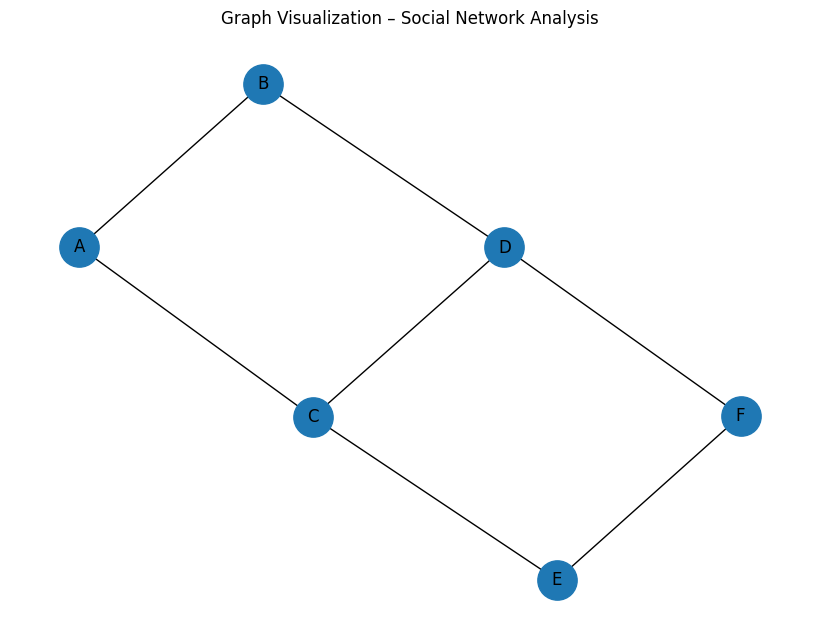

In [23]:
# -------------------------------------------------
# 4. Visualisasi graf jaringan
# -------------------------------------------------
pos = nx.spring_layout(G, seed=7)

plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=800,
    font_size=12
)
plt.title("Graph Visualization – Social Network Analysis")
plt.show()